In [458]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

In [459]:
df=pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [460]:
df.iloc[13]

Cement                190.00
Blast Furnace Slag    190.00
Fly Ash                 0.00
Water                 228.00
Superplasticizer        0.00
Coarse Aggregate      932.00
Fine Aggregate        670.00
Age                    90.00
Strength               42.33
Name: 13, dtype: float64

In [461]:
# Check for null values
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [462]:
#df.corr()

In [463]:
x,y = (df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']],df.Strength)
#x,y=make_classification(n_samples=1030,n_features=8,n_classes=2,random_state=42)

In [464]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=138)
#train,test=train_test_split(df,test_size=0.30,random_state=42)

In [465]:
x_train.shape

(721, 8)

In [466]:
y.shape

(1030,)

In [467]:
y_test.shape

(309,)

In [468]:
#pd.DataFrame(x_train)

In [469]:
reg=linear_model.LinearRegression()

In [470]:
reg.fit(x_train,y_train)

LinearRegression()

In [471]:
y_test

525     25.12
256     31.64
272     42.70
700      6.88
904     23.79
        ...  
877     31.42
794     26.74
401     58.52
875     18.28
1012    61.24
Name: Strength, Length: 309, dtype: float64

In [507]:
y_pred=reg.predict(x_test)

In [509]:
new_data_point = np.array([260.9, 100.5, 78.3, 200.6, 8.6, 864.5, 761.5, 28])

In [502]:
coefficients=reg.coef_   # it's show every column m //we know [ y = m1*x + m2*x + m3*x + c ]
coefficients

array([ 0.1164945 ,  0.10419801,  0.08431667, -0.17497516,  0.21151376,
        0.01417233,  0.01286235,  0.1138858 ])

In [503]:
intercept=reg.intercept_ # it's show c

In [510]:
reg.predict([[260.9,100.5,78.3,200.6,8.6,864.5,761.5,28	]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32.03464796])

# checking Manual way model Working Well or Not 

In [506]:
#(0.11902377*260.9)+	(0.09779638*100.5)+(0.08760915*78.3)+(-0.1670018*200.6)+(0.23509776*8.6)+(0.01184733*864.5)+(0.01514971*761.5)+(28*0.10723262)+(-8.804360208078663)

In [505]:
manual_prediction = np.sum(coefficients * new_data_point) + intercept
manual_prediction

32.03464796327584

In [477]:
differences = y_test - y_pred

In [478]:
# Create a DataFrame to display the actual, predicted, and difference values side by side
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': differences
})


In [479]:
print(results_df)

      Actual  Predicted  Difference
525    25.12  47.656873  -22.536873
256    31.64  28.894072    2.745928
272    42.70  32.203265   10.496735
700     6.88  19.630175  -12.750175
904    23.79  24.653632   -0.863632
...      ...        ...         ...
877    31.42  24.577121    6.842879
794    26.74  37.086089  -10.346089
401    58.52  48.110757   10.409243
875    18.28  24.863466   -6.583466
1012   61.24  45.163213   16.076787

[309 rows x 3 columns]


# Try to Find Which model is best for it 

In [488]:
# Ridge Regression
reg_ridge = Ridge(alpha=1.0)  # You can adjust the alpha value for different levels of regularization
reg_ridge.fit(x_train, y_train)
y_pred_ridge = reg_ridge.predict(x_test)

# Lasso Regression
reg_lasso = Lasso(alpha=1.0)  # You can adjust the alpha value for different levels of regularization
reg_lasso.fit(x_train, y_train)
y_pred_lasso = reg_lasso.predict(x_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)  # You can adjust the degree of polynomial
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
reg_poly = LinearRegression()
reg_poly.fit(x_train_poly, y_train)
y_pred_poly = reg_poly.predict(x_test_poly)

# Support Vector Regression (SVR)
reg_svr = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'rbf'
reg_svr.fit(x_train, y_train)
y_pred_svr = reg_svr.predict(x_test)
score_svr = r2_score(y_test, y_pred_svr)

# Decision Tree Regression
reg_dt = DecisionTreeRegressor()
reg_dt.fit(x_train, y_train)
y_pred_dt = reg_dt.predict(x_test)
score_dt = r2_score(y_test, y_pred_dt)

# Random Forest Regression
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred_rf = reg_rf.predict(x_test)
score_rf = r2_score(y_test, y_pred_rf)

# Gradient Boosting Regression
reg_gb = GradientBoostingRegressor()
reg_gb.fit(x_train, y_train)
y_pred_gb = reg_gb.predict(x_test)
score_gb = r2_score(y_test, y_pred_gb)

# AdaBoost Regression
reg_ab = AdaBoostRegressor()
reg_ab.fit(x_train, y_train)
y_pred_ab = reg_ab.predict(x_test)
score_ab = r2_score(y_test, y_pred_ab)

################################
# Apply polynomial features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Apply feature scaling
scaler = StandardScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

# Apply Ridge regression
alpha = 1.0  # Regularization strength
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(x_train_poly_scaled, y_train)

# Predictions
y_pred = ridge_reg.predict(x_test_poly_scaled)

# Evaluate model
score = r2_score(y_test, y_pred)


# R-Squared Value (Accuracy of those Model)

In [489]:
from sklearn.metrics import r2_score

In [490]:
score_linear=r2_score(y_test,y_pred)
score_ridge = r2_score(y_test, y_pred_ridge)
score_lasso = r2_score(y_test, y_pred_lasso)
score_poly = r2_score(y_test, y_pred_poly)
score_svr = r2_score(y_test, y_pred_svr)
score_dt = r2_score(y_test, y_pred_dt)
score_rf = r2_score(y_test, y_pred_rf)
score_gb = r2_score(y_test, y_pred_gb)
score_ab = r2_score(y_test, y_pred_ab)
score_mixed = r2_score(y_test, y_pred)

In [491]:
# Printing scores
print("Linear Regression R2 Score:", score_linear)
print("Ridge Regression R2 Score:", score_ridge)
print("Lasso Regression R2 Score:", score_lasso)
print("Polynomial Regression R2 Score:", score_poly)
print("SVR R2 Score:", score_svr)
print("Decision Tree Regression R2 Score:", score_dt)
print("Random Forest Regression R2 Score:", score_rf)
print("Gradient Boosting Regression R2 Score:", score_gb)
print("AdaBoost Regression R2 Score:", score_ab)
print("Mixed model(regularization ar polynomial ):", score_mixed)

Linear Regression R2 Score: 0.7748637716431683
Ridge Regression R2 Score: 0.5856396135697168
Lasso Regression R2 Score: 0.5836446790880367
Polynomial Regression R2 Score: 0.8995283777723114
SVR R2 Score: 0.22006261527280335
Decision Tree Regression R2 Score: 0.8663154044966637
Random Forest Regression R2 Score: 0.9148075297293795
Gradient Boosting Regression R2 Score: 0.9126233275578112
AdaBoost Regression R2 Score: 0.7984741836988931
Mixed model(regularization ar polynomial ): 0.7748637716431683


# Now Visualization of those model Accuracy

In [513]:
import matplotlib.pyplot as plt


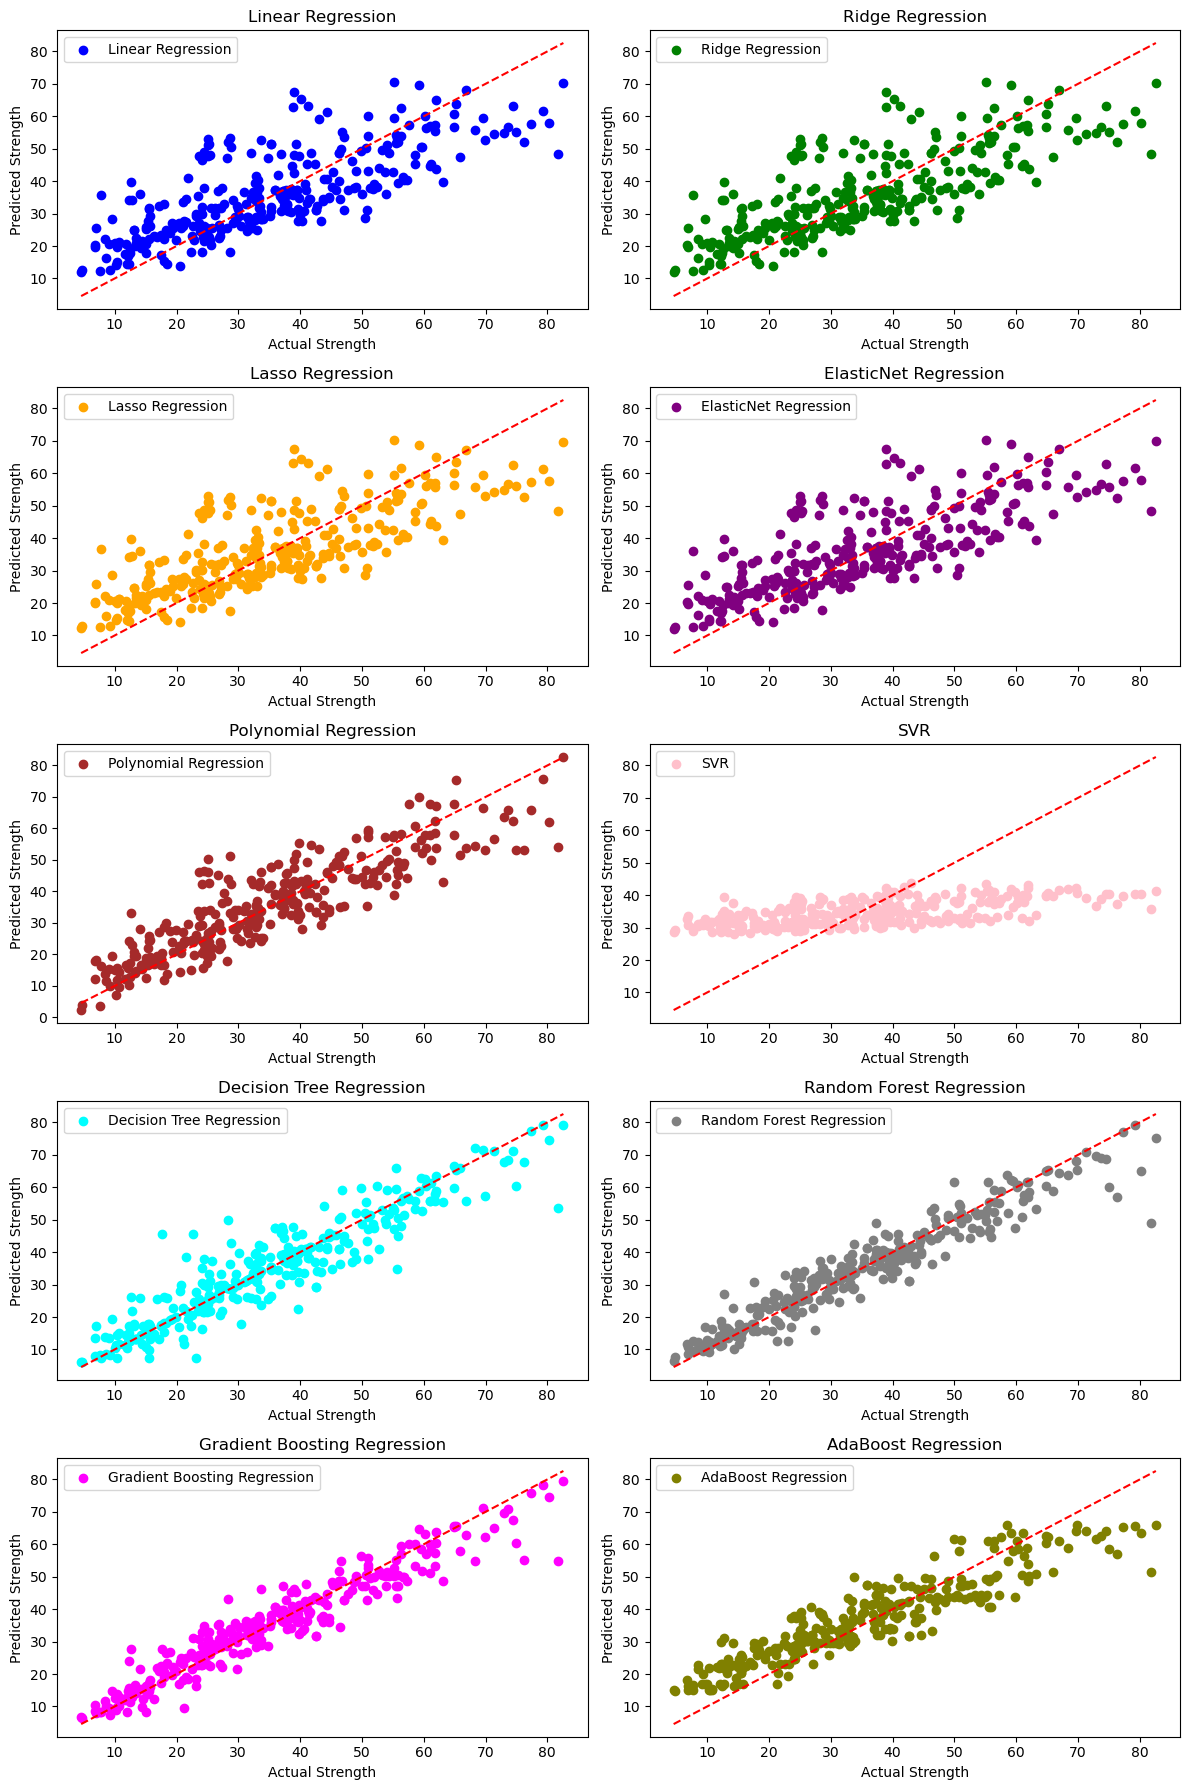

In [520]:
# Create a figure and axis objects
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Linear Regression
reg_linear = LinearRegression()
reg_linear.fit(x_train, y_train)

# Ridge Regression
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(x_train, y_train)

# Lasso Regression
reg_lasso = Lasso(alpha=1.0)
reg_lasso.fit(x_train, y_train)

# ElasticNet Regression
reg_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
reg_elasticnet.fit(x_train, y_train)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
reg_poly = LinearRegression()
reg_poly.fit(x_train_poly, y_train)

# SVR
reg_svr = SVR(kernel='rbf')
reg_svr.fit(x_train, y_train)

# Decision Tree Regression
reg_dt = DecisionTreeRegressor()
reg_dt.fit(x_train, y_train)

# Random Forest Regression
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

# Gradient Boosting Regression
reg_gb = GradientBoostingRegressor()
reg_gb.fit(x_train, y_train)

# AdaBoost Regression
reg_ab = AdaBoostRegressor()
reg_ab.fit(x_train, y_train)

# Predictions
y_pred_linear = reg_linear.predict(x_test)
y_pred_ridge = reg_ridge.predict(x_test)
y_pred_lasso = reg_lasso.predict(x_test)
y_pred_elasticnet = reg_elasticnet.predict(x_test)
y_pred_poly = reg_poly.predict(x_test_poly)
y_pred_svr = reg_svr.predict(x_test)
y_pred_dt = reg_dt.predict(x_test)
y_pred_rf = reg_rf.predict(x_test)
y_pred_gb = reg_gb.predict(x_test)
y_pred_ab = reg_ab.predict(x_test)

# Linear Regression
axs[0, 0].scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
axs[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[0, 0].set_xlabel('Actual Strength')
axs[0, 0].set_ylabel('Predicted Strength')
axs[0, 0].set_title('Linear Regression')
axs[0, 0].legend()

# Ridge Regression
axs[0, 1].scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
axs[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[0, 1].set_xlabel('Actual Strength')
axs[0, 1].set_ylabel('Predicted Strength')
axs[0, 1].set_title('Ridge Regression')
axs[0, 1].legend()

# Lasso Regression
axs[1, 0].scatter(y_test, y_pred_lasso, color='orange', label='Lasso Regression')
axs[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[1, 0].set_xlabel('Actual Strength')
axs[1, 0].set_ylabel('Predicted Strength')
axs[1, 0].set_title('Lasso Regression')
axs[1, 0].legend()

# ElasticNet Regression
axs[1, 1].scatter(y_test, y_pred_elasticnet, color='purple', label='ElasticNet Regression')
axs[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[1, 1].set_xlabel('Actual Strength')
axs[1, 1].set_ylabel('Predicted Strength')
axs[1, 1].set_title('ElasticNet Regression')
axs[1, 1].legend()

# Polynomial Regression
axs[2, 0].scatter(y_test, y_pred_poly, color='brown', label='Polynomial Regression')
axs[2, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[2, 0].set_xlabel('Actual Strength')
axs[2, 0].set_ylabel('Predicted Strength')
axs[2, 0].set_title('Polynomial Regression')
axs[2, 0].legend()

# SVR
axs[2, 1].scatter(y_test, y_pred_svr, color='pink', label='SVR')
axs[2, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[2, 1].set_xlabel('Actual Strength')
axs[2, 1].set_ylabel('Predicted Strength')
axs[2, 1].set_title('SVR')
axs[2, 1].legend()

# Decision Tree Regression
axs[3, 0].scatter(y_test, y_pred_dt, color='cyan', label='Decision Tree Regression')
axs[3, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[3, 0].set_xlabel('Actual Strength')
axs[3, 0].set_ylabel('Predicted Strength')
axs[3, 0].set_title('Decision Tree Regression')
axs[3, 0].legend()

# Random Forest Regression
axs[3, 1].scatter(y_test, y_pred_rf, color='gray', label='Random Forest Regression')
axs[3, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[3, 1].set_xlabel('Actual Strength')
axs[3, 1].set_ylabel('Predicted Strength')
axs[3, 1].set_title('Random Forest Regression')
axs[3, 1].legend()

# Gradient Boosting Regression
axs[4, 0].scatter(y_test, y_pred_gb, color='magenta', label='Gradient Boosting Regression')
axs[4, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[4, 0].set_xlabel('Actual Strength')
axs[4, 0].set_ylabel('Predicted Strength')
axs[4, 0].set_title('Gradient Boosting Regression')
axs[4, 0].legend()

# AdaBoost Regression
axs[4, 1].scatter(y_test, y_pred_ab, color='olive', label='AdaBoost Regression')
axs[4, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[4, 1].set_xlabel('Actual Strength')
axs[4, 1].set_ylabel('Predicted Strength')
axs[4, 1].set_title('AdaBoost Regression')
axs[4, 1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
